<a href="https://colab.research.google.com/github/yangdoit/miwon/blob/main/_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%9C%EB%B2%88%EC%97%90_%EB%81%9D%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컨볼루션 신경망(Convolution Neural Networks, CNN)

- 완전 연결 네트워크의 문제점으로부터 시작
  - 매개변수의 폭발적인 증가
  - 공간 추론의 부족: 픽셀 사이의 근접성 개념이 완전 연결 계층(Fully-Connected Layer)에서는 손실됨
- 동물의 시각피질(visual cortex, 視覺皮質)의 구조에서 영감을 받아 만들어진 딥러닝 신경망 모델
- 시각피질의 신경세포
  - 시야 내의 특정 영역에 대한 자극만 수용
  - 수용장(receptive field, 受容場)
  - 해당 영역의 특정 특징에 대해서만 반응
- 시각 자극이 1차 시각피질을 통해서 처리된 다음, 2차 시각피질을 경유하여, 3차 시각피질 등 여러 영역을 통과하여 계층적인 정보처리
- 정보가 계층적으로 처리되어 가면서 점차 추상적인 특징이 추출되어 시각 인식
- 동물의 계층적 특징 추출과 시각인식 체계를 참조하여 만들어진 모델
  - 전반부 : 컨볼루션 연산을 수행하여 특징 추출
  - 후반부 : 특징을 이용하여 분류
- 영상분류, 문자 인식 등 인식문제에 높은 성능

  <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png">

# 컨볼루션 연산 (Convolution Operation)

- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  - 필터에 대응하는 원소끼리 곱하고, 그 합을 구함
  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 함
  - 이미지 처리에서 사용하는 '이미지 필터'와 비슷한 개념
  - 필터의 사이즈는 거의 항상 홀수
    - 짝수이면 패딩이 비대칭이 되어버림
    - 왼쪽, 오른쪽을 다르게 주어야함
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재
  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
  - 과적합을 방지할 수 있음

  <img src="https://theano-pymc.readthedocs.io/en/latest/_images/numerical_padding_strides.gif">

- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈

  $\quad (n-f+1) \times (n-f+1)$

  $n$: 입력 데이터의 크기  
  $f$: 필터(커널)의 크기

  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

- 위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로 출력 데이터의 크기는 $(5 - 3 + 1) = 3$

# 패딩(Padding)과 스트라이드(Stride)

- 필터(커널) 사이즈과 함께 입력 이미지와 출력 이미지의 사이즈를 결정하기 위해 사용
- 사용자가 결정할 수 있음


## 패딩(Padding)

- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif" width="300">

- 출력 데이터의 크기

  $\quad (n+2p-f+1) \times (n+2p-f+1)$

  - 위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로 출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

- `valid`
  - 패딩을 주지 않음
  - `padding=0`은 0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미
- `same`
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같도록 유지
  - 만약, 필터(커널)의 크기가 $k$ 이면, 패딩의 크기는 $p = \frac{k-1}{2}$ (단, stride=1)

## 스트라이드(Stride)

- 필터를 적용하는 간격을 의미
- 아래 예제 그림은 간격이 2

  <img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif">

## 출력 데이터의 크기

  $\qquad OH = \frac{H + 2P - FH}{S} + 1 $
  
  $\qquad OW = \frac{W + 2P - FW}{S} + 1 $

  - 입력 크기 : $(H, W)$
  - 필터 크기 : $(FH, FW)$
  - 출력 크기 : $(OH, OW)$
  - 패딩, 스트라이드 : $P, S$

- 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
- 정수로 나누어 떨어지지 않으면, 패딩, 스트라이드 값을 조정하여 정수로 나누어 떨어지게 해야함
  
  

# 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

## 맥스 풀링(Max Pooling)

- 가장 많이 사용되는 방법
- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일

  $\quad OH = \frac{H + 2P - FH}{S} + 1 $
  
  $\quad OW = \frac{W + 2P - FW}{S} + 1 $

- 일반적으로 stride=2, kernel_size=2 를 통해 특징맵의 크기를 절반으로 줄이는 역할
- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며, 컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
- 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는 2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출
- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 함

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

## 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정
- 과거에 많이 사용, 요즘은 잘 사용되지 않음
- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해 특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">


## 전역 평균 풀링(Global Avg Pooling)

- 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음
- 출력층에는 유용할 수 있음

# 완전 연결 계층(Fully-Connected Layer)

- 입력으로 받은 텐서를 1차원으로 평면화(flatten) 함
- 밀집 계층(Dense Layer)라고도 함
- 일반적으로 분류기로서 네트워크의 마지막 계층에서 사용

# 유효 수용 영역(ERF, Effective Receptive Field)

- 입력 이미지에서 거리가 먼 요소를 상호 참조하여 결합하여 네트워크 능력에 영향을 줌
- 입력 이미지의 영역을 정의해 주어진 계층을 위한 뉴런의 활성화에 영향을 미침
- 한 계층의 필터 크기나 윈도우 크기로 불리기 때문에 RF(receptive field, 수용 영역)이라는 용어를 흔히 볼 수 있음

  <img src="https://wiki.math.uwaterloo.ca/statwiki/images/8/8c/understanding_ERF_fig0.png">

- RF의 중앙에 위치한 픽셀은 주변에 있는 픽셀보다 더 높은 가중치를 가짐
  - 중앙부에 위치한 픽셀은 여러 개의 계층을 전파한 값
  - 중앙부에 있는 픽셀은 주변에 위치한 픽셀보다 더 많은 정보를 가짐

- 가우시안 분포를 따름

  <img src="https://www.researchgate.net/publication/316950618/figure/fig4/AS:495826810007552@1495225731123/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks.png">

# CNN 모델 학습

## MNIST (LeNet)

- Yann LeCun 등의 제안(1998)
- 5 계층 구조: Conv-Pool-Conv- Pool-Conv-FC-FC(SM)
- 입력 : 32x32 필기체 숫자 영상 (MNIST 데이터)
- 풀링 : 가중치x(2x2블록의 합) + 편차항  
- 시그모이드 활성화 함수 사용
- 성능: 오차율 0.95%(정확도: 99.05%)

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  <center>[LeNet-5 구조]</center>

### 모듈 임포트

### 데이터 로드 및 전처리

### 모델 구성 및 컴파일

### 모델 학습 및 평가

## Fashion MNIST

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

### 모듈 임포트

### 데이터 로드 및 전처리

### 모델 구성 및 학습
- 임의의 모델

### 모델 구성 및 학습: 과대적합 방지

- 학습 파라미터의 수 비교

### 모델 성능 높이기: 레이어 추가

- 과대적합은 되지 않았고, 층을 늘려도 좋은 성능을 낼 수 있음

### 모델 성능 높이기: 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

데이터 추가

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

## CIFAR-10

* CIFAR-10
  - 10개의 클래스로 구분된 32 x 32 사물 사진을 모은 데이터셋
  - 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성
  - 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
    - 단순한 신경망으로 특징을 검출하기 어려움


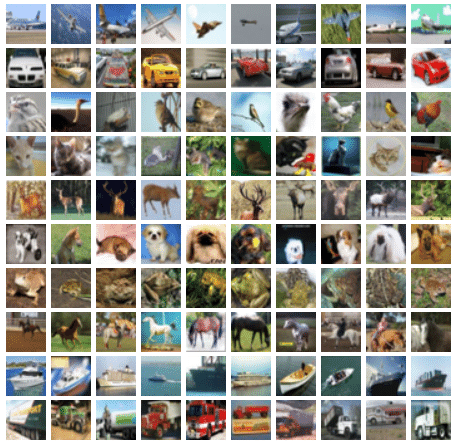

### 모듈 임포트

### 데이터 로드 및 전처리

### 모델 구성 및 학습


### 모델 구성 및 학습: 과대적합 방지


- 해당 모델은 성능이 좋지 않음
- 규제화, 드롭아웃 등 과대적합을 방지하는 기술 필요

# CNN 모델의 발전

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions**
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**
* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


## VGGNet(Visual Geometry Group Net)

- 2014년 ILSVRC에서 2등 차지 (상위-5 오류율: 7.32%), 이 후의 수많은 연구에 영향을 미침

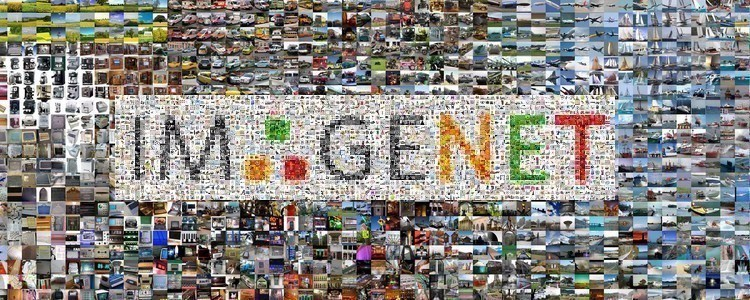

- 특징
  - 활성화 함수로 `ReLU` 사용, Dropout 적용
  - 합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
  - 이미지 변환, 좌우 반전 등의 변환을 시도하여 인위적으로 데이터셋을 늘림
  - 몇 개의 합성곱 계층과 최대-풀링 계층이 따르는 5개의 블록과, 3개의 완전연결계층(학습 시, 드롭아웃 사용)으로 구성
  - 모든 합성곱과 최대-풀링 계층에 `padding='SAME'` 적용
  - 합성곱 계층에는 `stride=1`, 활성화 함수로 `ReLU` 사용
  - 특징 맵 깊이를 증가시킴
  - 척도 변경을 통한 데이터 보강(Data Augmentation)

- 기여

  - 3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
  - 11x11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여, 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음
  - 합성곱 계층의 개수가 많아지면, 매개변수 개수를 줄이고, 비선형성을 증가시킴

- VGG-16 모델(16개 층)

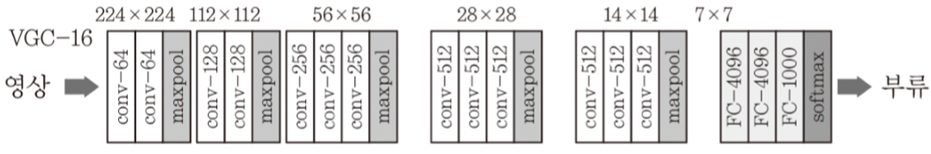

- VGG-19 모델(19개 층)  

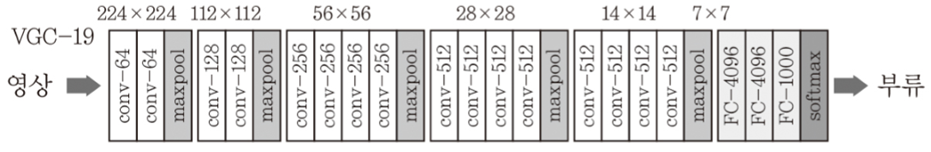

- ImageNet에서 훈련이 끝난 후 얻게된 매개변수 값 로딩
- 네트워크를 다시 처음부터 학습하고자 한다면 `weights=None`으로 설정, 케라스에서 무작위로 가중치를 설정함
- `include_top=False`: VGG의 밀집 계층을 제외한다는 뜻
- 해당 네트워크의 출력은 합성곱/최대-풀링 블록의 특징맵이 됨
- `pooling`: 특징맵을 반환하기 전에 적용할 선택적인 연산을 지정

* dog.jpg (https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg)

## GoogLeNet, Inception

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림

  <img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

- 특징
  - CNN 계산 용량을 최적화하는 것을 고려
  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과 (해당 모듈을 하위 네트워크라고도 함)
  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결
  - 모든 합성곱과 풀링 계층의 `padding`옵션은 `'SAME'`이며 `stride=1` 활성화 함수는 `ReLU` 사용

- 기여
  - 규모가 큰 블록과 병목을 보편화
  - 병목 계층으로 1x1 합성곱 계층 사용
  - 완전 연결 계층 대신 풀링 계층 사용
  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

* fish.jpg (https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg)

## ResNet(Residual Net)

- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵셥으로 `'SAME'`, `stride=1` 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음

  <img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

* bee.jpg (https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg)

## Xception

* Inception module을 이용하여 depthwise convolution 적용

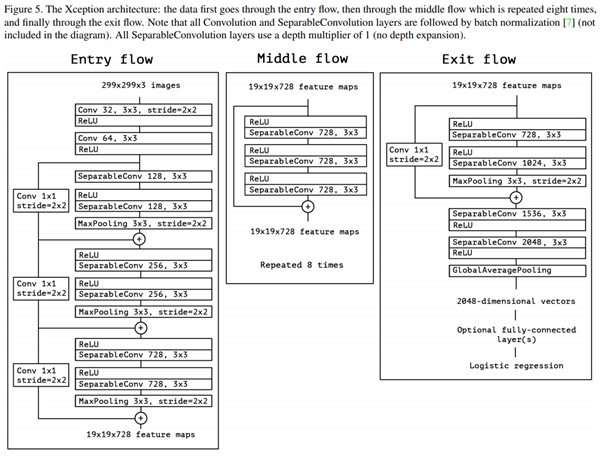

* 기존의 Conv layer에서 얻은 feature map을 각 채널별로 다른 Conv layer에 적용하여 feature map을 얻음

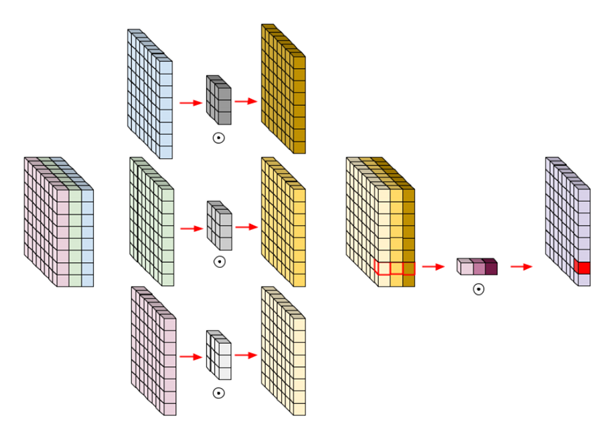

* beaver.jpg (https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg)

## MobileNet

* 성능보다 모델의 크기 또는 연산 속도 감소
* Depthwise conv와 Pointwise conv 사이에도 batch normalization과 ReLU를 삽입
* Conv layer를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임

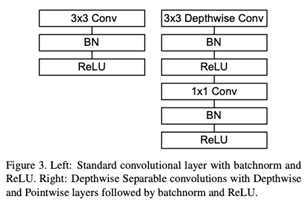

* crane.jpg (https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg)

## DenseNet

* 각 층은 모든 앞 단계에서 올 수 있는 지름질 연결 구성
* 특징지도의 크기를 줄이기 위해 풀링 연산 적용 필요
* 밀집 블록(dense block)과 전이층(transition layer)으로 구성
* 전이층 : 1x1 컨볼루션과 평균값 풀링(APool)으로 구성   

<img src="https://oi.readthedocs.io/en/latest/_images/cnn_vs_resnet_vs_densenet.png" width="700">

* zebra.jpg (https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg)

## NasNet

* 신경망 구조를 사람이 설계하지 않고, complete search를 통해 자동으로 구조를 찾아냄
* 네트워크를 구성하는 layer를 하나씩 탐색하는 NAS 방법 대신, NasNet은 Convolution cell 단위를 먼저 추정하고, 이들을 조합하여 전체 네트워크 구성
* 성능은 높지만, 파라미터 수와 연산량은 절반 정도로 감소

* notebook.jpg (https://cdn.pixabay.com/photo/2016/07/11/03/35/macbook-1508998_1280.jpg)

## EfficientNet

* EfficientNetB0인 작은 모델에서 주어진 Task에 최적화된 구조로 수정해나가는 형태
* 복잡한 Task에 맞춰 모델의 Capacity를 늘리기 위해 Wide Scaling, Deep Scaling, 그리고 Resolution Scaling을 사용
* EfficientNet은 Wide, Deep, Resolution을 함께 고려하는 Compound Scaling을 사용

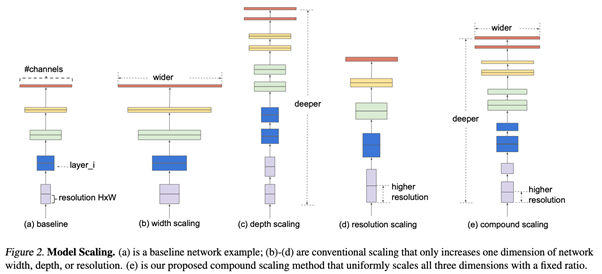

* plane.jpg (https://upload.wikimedia.org/wikipedia/commons/1/12/Plane-in-flight.jpg)